<a href="https://colab.research.google.com/github/arac22/keras-demo/blob/main/AutoKeras_Demo_Two_ok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install autokeras

In [9]:
import os
import shutil

import numpy as np
import pandas as pd
import tensorflow as tf

import autokeras as ak


In [ ]:
TRAIN_DATA_URL = "https://raw.githubusercontent.com/arac22/keras-demo/main/mouse-points-train.csv"
TEST_DATA_URL = "https://raw.githubusercontent.com/arac22/keras-demo/main/mouse-points-eval.csv"

train_file_path = tf.keras.utils.get_file("train.csv", TRAIN_DATA_URL)
test_file_path = tf.keras.utils.get_file("eval.csv", TEST_DATA_URL)



In [ ]:
!ls -l /root/.keras/datasets/train.csv
!cat  /root/.keras/datasets/train.csv


In [ ]:
# Initialize the structured data classifier.
clf = ak.StructuredDataClassifier(
    overwrite=True, max_trials=3
)  # It tries 3 different models.
# Feed the structured data classifier with training data.
clf.fit(
    # The path to the train.csv file.
    train_file_path,
    # The name of the label column.
    "label",
    epochs=10,
)



In [ ]:
# Predict with the best model.
predicted_y = clf.predict(test_file_path)
# Evaluate the best model with testing data.
print(clf.evaluate(test_file_path, "label"))

In [14]:
from pandas.io.parsers.readers import read_csv

import io
df1 = read_csv('/root/.keras/datasets/train.csv')


In [ ]:
# heat map of predictions with the best model 

map_x = np.empty((0,2), int)

map_step = 20 
for i in range(0,400,map_step):
  for j in range(1,640,map_step):
    map_x = np.append(map_x, np.array([[j,i]]), axis=0)

map_predicted_y = clf.predict(map_x)


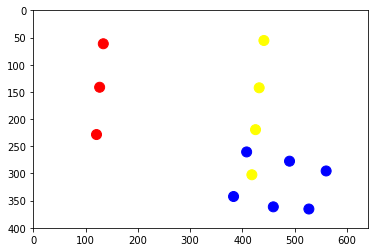

In [28]:
import matplotlib.pyplot as plt

df2=df1.loc[0:12]

fig, ax = plt.subplots()
colors = {'C':'red', 'D':'yellow', 'E':'blue'}
ax.scatter(df2['x'], df2['y'], c=df2['label'].map(colors), s=100)
plt.axis([0, 640, 0, 400])
ax.invert_yaxis()

plt.show()

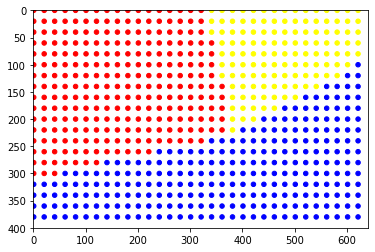

In [30]:
df_map = pd.DataFrame(map_x, columns = ['x','y'])
df_predicted_map = pd.DataFrame(map_predicted_y, columns=['label'])

fig, ax = plt.subplots()
colors = {'C':'red', 'D':'yellow', 'E':'blue'}
ax.scatter(df_map['x'], df_map['y'], c=df_predicted_map['label'].map(colors),s=20)
plt.axis([0, 640, 0, 400])
ax.invert_yaxis()

plt.show()

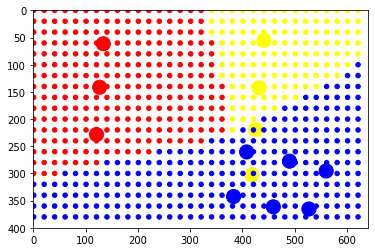

In [31]:
fig2, ax2 = plt.subplots()
colors = {'C':'red', 'D':'yellow', 'E':'blue'}
ax2.scatter(df2['x'], df2['y'], c=df2['label'].map(colors), s=200)

ax2.scatter(df_map['x'], df_map['y'], c=df_predicted_map['label'].map(colors),s=20)

plt.axis([0, 640, 0, 400])
ax2.invert_yaxis()

plt.show()